# Exploring and Analyzing Text Data Assignment 

In [3]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [52]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
PATH='/content/drive/MyDrive/python_for_data_scientists/DSI07/DataSets/cnn_lite'
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [13]:
len([word_tokenize(sent) for sent in sent_tokenize(docs[0])])

75

In [21]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [22]:
stats = []

for i, doc in enumerate(docs):
  doc_stats = text_stats(doc)
  doc_stats = [f'Article_{i}'] + doc_stats
  stats.append(doc_stats)


In [24]:
len(stats)

57

In [30]:
#make into dataframe
df = pd.DataFrame(stats)
df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg_Sent_Length', 'Avg_Word_Length', 'Lexical_Diversity']
df

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg_Sent_Length,Avg_Word_Length,Lexical_Diversity
0,Article_0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,Article_1,20,469,262,179,25,13.100000,6.248092,0.683206
2,Article_2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,Article_3,28,803,454,255,33,16.214286,6.011013,0.561674
4,Article_4,34,620,316,204,16,9.294118,5.924051,0.645570
5,Article_5,19,298,171,124,13,9.000000,5.514620,0.725146
6,Article_6,41,921,452,310,12,11.024390,6.723451,0.685841
7,Article_7,423,7635,3949,1390,154,9.335697,5.867815,0.351988
8,Article_8,96,2218,1104,732,56,11.500000,6.316123,0.663043
9,Article_9,14,249,133,109,7,9.500000,5.887218,0.819549


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [31]:
df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg_Sent_Length,Avg_Word_Length,Lexical_Diversity
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,51.385965,1025.192982,542.087719,313.614035,36.122807,11.088300,6.009093,0.671872
std,69.758961,1217.950114,631.513468,259.973608,38.035730,2.439322,0.405653,0.106225
min,4.000000,30.000000,19.000000,18.000000,4.000000,4.750000,5.131579,0.351988
25%,18.000000,372.000000,197.000000,140.000000,15.000000,9.500000,5.736842,0.618750
50%,26.000000,585.000000,320.000000,209.000000,25.000000,10.615385,6.046366,0.667925
75%,63.000000,1297.000000,717.000000,429.000000,45.000000,12.887097,6.315447,0.730263
max,423.000000,7635.000000,3949.000000,1390.000000,238.000000,16.708333,6.827086,0.947368


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [42]:
doc = docs[4]

cleaned = [token.lower() for token in word_tokenize(doc) 
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

fdist = FreqDist(cleaned)

#dataframe
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
#change column names
fdist_df.columns = ['Term', 'Freq']
fdist_df.head()

,Term,Freq
0,cnn,5
1,child,3
2,prodigy,2
3,belgium,1
4,course,4


In [43]:
ordered = fdist_df.sort_values('Freq', ascending=False)

filtered = ordered[ordered['Freq'] > 1]
filtered.head()

,Term,Freq
11,laurent,15
42,said,10
0,cnn,5
7,degree,5
22,students,4


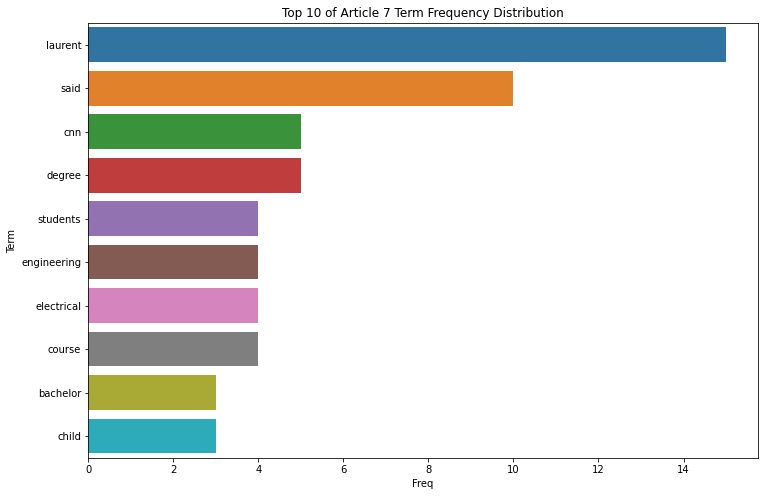

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=filtered.head(10), x='Freq', y='Term')
plt.title('Top 10 of Article 7 Term Frequency Distribution')
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [45]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")

  plt.tight_layout(pad=0)
  plt.show()

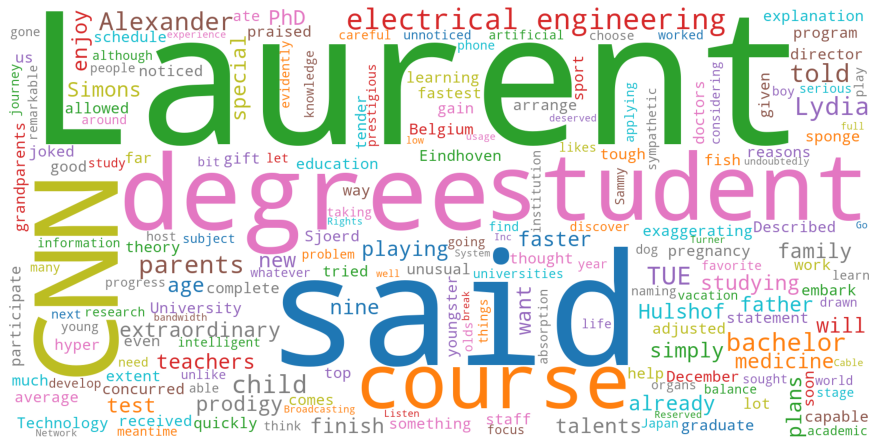

In [46]:
wordcloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

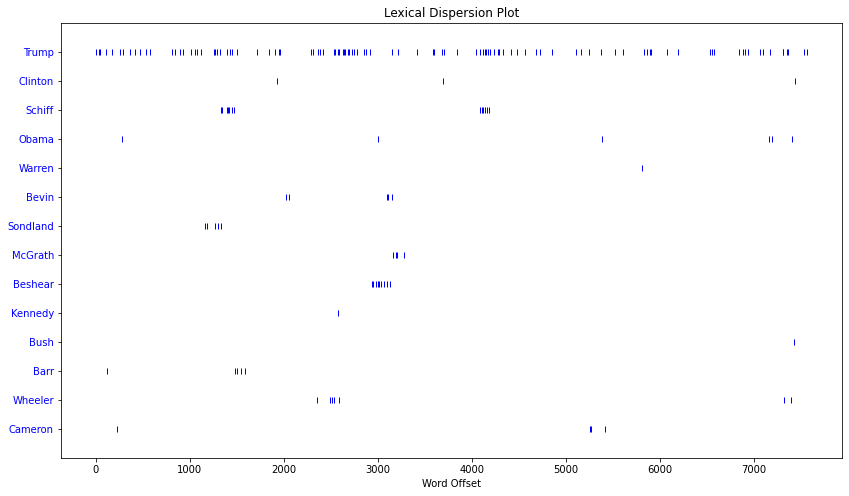

In [49]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

doc = docs[7]
tokenized = word_tokenize(doc)

terms = ['Trump', 'Clinton', 'Schiff', 'Obama', 'Warren', 'Bevin', 'Sondland',
         'McGrath', 'Beshear', 'Kennedy', 'Bush', 'Barr', 'Wheeler', 'Cameron']

Text(tokenized).dispersion_plot(terms)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [50]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [53]:
doc = docs[43]

tokens = word_tokenize(doc) 
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer() 
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))
print('\n')

( CNN ) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run , a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins . On the eve of the first public impeachment hearings , former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state 's Democratic primary ballot , should he decide to run . Former Massachusetts Gov . Deval Patrick weighed a late entry to the race while facing down Friday 's filing deadline in the key state of New Hampshire . And Hillary Clinton coyly suggested , once again , that she could leap from the sidelines . Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency , and undoubtedly unnerving some current 2020 Democrats . Clinton told BBC Radio that she was not running for president in 2020 , but she left the door ajar . `` Never say never , and I will certainly tell you I 'm unde